In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
colNames = ['Gender','Age','Debt','Married','BankCustomer','EducationalLevel','A7','YearsEmployed','Prior','Employed','CreditScore','DriversLicense','Citizen','Zipcode','Income','Approval']
df = pd.read_csv('TestData\\crx.data',names=colNames)

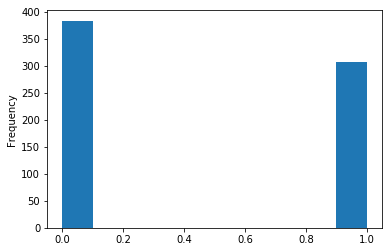

In [2]:
Approval = {'+':1,'-':0}
df.Approval = [Approval[status] for status in df.Approval]
df.Approval.plot('hist')

In [3]:
import numpy as np
df['Age']=df['Age'].replace('?',np.nan)
df['Gender']=df['Gender'].replace('?',np.nan)
Gender = {'b':1,'a':0,np.nan:0}
df.Gender = [Gender[status] for status in df.Gender]
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationalLevel,A7,YearsEmployed,Prior,Employed,CreditScore,DriversLicense,Citizen,Zipcode,Income,Approval
0,1,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,0,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,0,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,1,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,1,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [4]:
print(df[df['Married']=='?'])
df = df[df.Married != '?']
print(df[df['EducationalLevel']=='?'])

     Gender    Age  Debt Married BankCustomer EducationalLevel A7  \
206       0  71.58   0.0       ?            ?                ?  ?   
270       1  37.58   0.0       ?            ?                ?  ?   
330       1  20.42   0.0       ?            ?                ?  ?   
456       1  34.58   0.0       ?            ?                ?  ?   
592       1  23.17   0.0       ?            ?                ?  ?   
622       0  25.58   0.0       ?            ?                ?  ?   

     YearsEmployed Prior Employed  CreditScore DriversLicense Citizen Zipcode  \
206            0.0     f        f            0              f       p       ?   
270            0.0     f        f            0              f       p       ?   
330            0.0     f        f            0              f       p       ?   
456            0.0     f        f            0              f       p       ?   
592            0.0     f        f            0              f       p       ?   
622            0.0     f      

In [5]:
df = df[df.EducationalLevel != '?']

In [6]:
df = pd.concat([df,pd.get_dummies(df['Married'], prefix='Married')],axis=1)

In [7]:
df.drop(['Married'],axis=1, inplace=True)

In [8]:
df.head()

,Gender,Age,Debt,BankCustomer,EducationalLevel,A7,YearsEmployed,Prior,Employed,CreditScore,DriversLicense,Citizen,Zipcode,Income,Approval,Married_l,Married_u,Married_y
0,1,30.83,0.000,g,w,v,1.25,t,t,1,f,g,00202,0,1,0,1,0
1,0,58.67,4.460,g,q,h,3.04,t,t,6,f,g,00043,560,1,0,1,0
2,0,24.50,0.500,g,q,h,1.50,t,f,0,f,g,00280,824,1,0,1,0
3,1,27.83,1.540,g,w,v,3.75,t,t,5,t,g,00100,3,1,0,1,0
4,1,20.17,5.625,g,w,v,1.71,t,f,0,f,s,00120,0,1,0,1,0


In [9]:
df = pd.concat([df,pd.get_dummies(df['BankCustomer'], prefix='BankCustomer',drop_first=True)],axis=1)
df.drop(['BankCustomer'],axis=1,inplace=True)
df = pd.concat([df,pd.get_dummies(df['EducationalLevel'], prefix='EducationalLevel',drop_first=True)],axis=1)
df.drop(['EducationalLevel'],axis=1,inplace=True)
df = pd.concat([df,pd.get_dummies(df['A7'], prefix='A7',drop_first=True)],axis=1)
df.drop(['A7'],axis=1,inplace=True)
df = pd.concat([df,pd.get_dummies(df['Prior'], prefix='Prior',drop_first=True)],axis=1)
df.drop(['Prior'],axis=1,inplace=True)
df = pd.concat([df,pd.get_dummies(df['Employed'], prefix='Employed',drop_first=True)],axis=1)
df.drop(['Employed'],axis=1,inplace=True)
df = pd.concat([df,pd.get_dummies(df['DriversLicense'], prefix='DriversLicense',drop_first=True)],axis=1)
df.drop(['DriversLicense'],axis=1,inplace=True)
df = pd.concat([df,pd.get_dummies(df['Citizen'], prefix='Citizen',drop_first=True)],axis=1)
df.drop(['Citizen'],axis=1,inplace=True)

In [10]:
df['Zipcode']=df['Zipcode'].replace('?',np.nan)
df.isnull().sum()

Gender                  0
Age                    12
Debt                    0
YearsEmployed           0
CreditScore             0
Zipcode                 7
Income                  0
Approval                0
Married_l               0
Married_u               0
Married_y               0
BankCustomer_gg         0
BankCustomer_p          0
EducationalLevel_c      0
EducationalLevel_cc     0
EducationalLevel_d      0
EducationalLevel_e      0
EducationalLevel_ff     0
EducationalLevel_i      0
EducationalLevel_j      0
EducationalLevel_k      0
EducationalLevel_m      0
EducationalLevel_q      0
EducationalLevel_r      0
EducationalLevel_w      0
EducationalLevel_x      0
A7_dd                   0
A7_ff                   0
A7_h                    0
A7_j                    0
A7_n                    0
A7_o                    0
A7_v                    0
A7_z                    0
Prior_t                 0
Employed_t              0
DriversLicense_t        0
Citizen_p               0
Citizen_s   

In [11]:
df['Zipcode']=df['Zipcode'].fillna(df['Zipcode'].value_counts().index[0])
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] =  df['Age'].fillna(df['Age'].mean())
df.describe()

,Gender,Age,Debt,YearsEmployed,CreditScore,Income,Approval,Married_l,Married_u,Married_y,...,A7_j,A7_n,A7_o,A7_v,A7_z,Prior_t,Employed_t,DriversLicense_t,Citizen_p,Citizen_s
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,...,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,0.679883,31.451883,4.806990,2.251872,2.431718,1030.330396,0.444934,0.002937,0.760646,0.236417,...,0.011747,0.005874,0.002937,0.585903,0.011747,0.528634,0.433186,0.462555,0.002937,0.082232
std,0.466864,11.657424,4.988754,3.359283,4.887119,5243.226720,0.497324,0.054153,0.427003,0.425193,...,0.107826,0.076471,0.054153,0.492927,0.107826,0.499546,0.495880,0.498962,0.054153,0.274920
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,0.165000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,28.580000,2.875000,1.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,37.500000,7.500000,2.750000,3.000000,400.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,76.750000,28.000000,28.500000,67.000000,100000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.isnull().sum()

Gender                 0
Age                    0
Debt                   0
YearsEmployed          0
CreditScore            0
Zipcode                0
Income                 0
Approval               0
Married_l              0
Married_u              0
Married_y              0
BankCustomer_gg        0
BankCustomer_p         0
EducationalLevel_c     0
EducationalLevel_cc    0
EducationalLevel_d     0
EducationalLevel_e     0
EducationalLevel_ff    0
EducationalLevel_i     0
EducationalLevel_j     0
EducationalLevel_k     0
EducationalLevel_m     0
EducationalLevel_q     0
EducationalLevel_r     0
EducationalLevel_w     0
EducationalLevel_x     0
A7_dd                  0
A7_ff                  0
A7_h                   0
A7_j                   0
A7_n                   0
A7_o                   0
A7_v                   0
A7_z                   0
Prior_t                0
Employed_t             0
DriversLicense_t       0
Citizen_p              0
Citizen_s              0
dtype: int64

In [14]:
labels = df['Approval'] 
df.drop(['Approval'],axis=1,inplace = True)
labels.columns = ['Approval']

In [15]:
from sklearn import preprocessing
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
features_norm = pd.DataFrame(x_scaled)
features_norm.columns = list(df.columns.values)
features_norm.describe()

C:\Users\swathi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Gender,Age,Debt,YearsEmployed,CreditScore,Zipcode,Income,Married_l,Married_u,Married_y,...,A7_j,A7_n,A7_o,A7_v,A7_z,Prior_t,Employed_t,DriversLicense_t,Citizen_p,Citizen_s
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,...,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,0.679883,0.280982,0.171678,0.079013,0.036294,0.091298,0.010303,0.002937,0.760646,0.236417,...,0.011747,0.005874,0.002937,0.585903,0.011747,0.528634,0.433186,0.462555,0.002937,0.082232
std,0.466864,0.185038,0.178170,0.117870,0.072942,0.087049,0.052432,0.054153,0.427003,0.425193,...,0.107826,0.076471,0.054153,0.492927,0.107826,0.499546,0.495880,0.498962,0.054153,0.274920
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.141587,0.035714,0.005789,0.000000,0.035000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.235397,0.102679,0.035088,0.000000,0.080000,0.000050,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.376984,0.267857,0.096491,0.044776,0.137000,0.004000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_norm,labels,test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
y_pred=logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.8613138686131386


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[65,  7],
       [12, 53]], dtype=int64)